<a href="https://colab.research.google.com/github/whatsgoodg/ML-DL-basics/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 35마리의 도미에 대한 두 가지의 특성(feature)
* 길이
* 무게

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

> 특성을 **`산점도`**로 표현
* x축: 길이
* y축: 무게

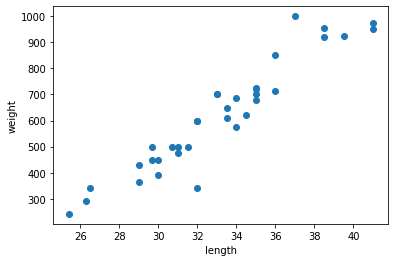

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # 길이
plt.ylabel('weight') # 무게
plt.show() # 그래프를 보여줌

> 빙어(14개의 sample)도 똑같은 작업을 해준다.

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

<function matplotlib.pyplot.show(*args, **kw)>

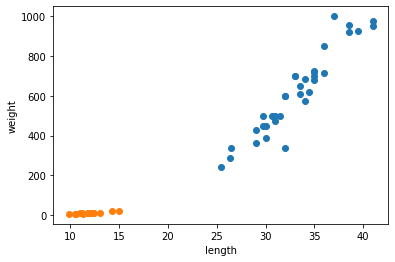

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

>**`scikit-learn`**을 사용하여 머신러닝을 학습한다.       
이를 위한 **feature**을 모두 담은 2차원 배열이 필요하다.(shape는 (49, 2)이다)       
feature에 상응하는 **class**도 2차원 배열로 표현한다.        
* fish_data: features
* fish_target: classes(도미 1, 빙어 0)


In [ ]:
length = bream_length + smelt_length # 데이터를 모아줌
weight = bream_weight + smelt_weight # ditto

In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)]

In [ ]:
fish_target = [1] * 35 + [0] * 14

>**사이킷런**의 **`k-최근접 이웃` 알고리즘**을 구현한 **KNeigborsClassifier**를 임포트         

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

>객체 생성

In [ ]:
kn = KNeighborsClassifier()

>kn 모델을 학습 후 정확도 계산

In [ ]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [ ]:
kn.score(fish_data, fish_target)

1.0

>**`k-최근접 이웃 알고리즘`**을 알아보자.       
한 샘플의 feature를 넘겨줬을 때, 산점도에서 가까운 class로 분류될 것이다.

In [ ]:
kn.predict([[30, 600]]) # 도미로 분류된다 1

array([1])

>n_neighbors의 인자를 **전체 data set의 크기**로 정할 경우       
<u>**가장 많은** sample 가진 특정 class으로만 맞히게 됨.</u>    
이는 KNeighborClassifier의 k-최근접 이웃 알고리즘의 성질 때문이다    

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [ ]:
if(kn49.score(fish_data, fish_target) == 35/49):
	print(True)
35/49

True


0.7142857142857143

>테스트 문제 n_neighbors에서 100%에 미치지 못하는 인자 찾기

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
